# Markdown
Actually, the best way to make a notebook look nice ist to **extensively use markdown**. For example, we can generate a nice static table of contents like this:

1. [jupyter_contrib_nbextensions](#nbext)
    * [Table of contents 2](#toc2)
    * [LaTeX_envs](#tex)
    * [Exercise](#ex)
    * [Python in markdown](#mark)

2. [Interactive and animated plots](#plot)
    * [Data](#data)
    * [maplotlib notebook](#matnb)
    * [Animated plots](#ani)

3. [Nbconvert](#nbcon)

Links are generally written like this link to [nbextension.readthedocs](http://jupyter-contrib-nbextensions.readthedocs.io).

# jupyter_contrib_nbextensions<a id='nbext'></a>
This PyMOTW is about [jupyter_contrib_nbextensions](https://github.com/ipython-contrib/jupyter_contrib_nbextensions), a repository containing a collection of extensions that add functionality to the Jupyter notebook. These extensions are mostly written in Javascript and will be loaded locally in your browser.

LINKS:
* https://github.com/ipython-contrib/jupyter_contrib_nbextensions
* http://jupyter-contrib-nbextensions.readthedocs.io


The notebook extensions can be selected and configured in your Jupyter home tree via the tab *Nbextensions* (http://localhost:8888/tree#nbextensions_configurator).

## Table of contents 2 (toc2) <a id='toc2'></a>
The toc2 extension enables to collect all running headers and display them in a floating window, as a sidebar or with a navigation menu. The extension is also draggable, resizable, collapsable, dockable and features automatic numerotation with unique links ids, and an optional toc cell.

Have a look at the options in the Nbextensions tab. **NOTE:** When using toc2 you may not use `<a id='toc'></a>`!

### Conclusion
**I love this**. Simple and easy. Look at the sidebar table of contents. Neat, right? Let's you jump to different sections quite easy and also shows you which section is <span class="mark">currently selected</span> and which section is <span class="burk">queued to run</span>.

## LaTeX_envs<a id='tex'></a>

### Equations, `\ref{eq:}`, theorem environments
The following code

renders like this:

The dot-product is defined by equation (\ref{eq:dotp}) in theorem \ref{theo:dotp} just below:
\begin{theorem}[Dot Product] \label{theo:dotp}
Let $u$ and $v$ be two vectors of $\mathbb{R}^n$. The dot product can be expressed as
\begin{equation}
\label{eq:dotp}
u^Tv = |u||v| \cos \theta,
\end{equation}
where $\theta$ is the angle between $u$ and $v$ ...
\end{theorem}

### Citations, bibliography and references
It seems, that you can place a `.bib` file in the same directory as the notebook and use `\cite{}` to generate citations. Let's see if it works: \cite{Thomson1887}, \cite{Hebb1949}

Unfortunately, it does not really work for me, maybe because nbextensions said that latex_envs was *possibly incompatible*. My output after clicking *Read bibliography and generate references section* is the following:

#### References

[<a id="cit-Thomson1887" href="#call-Thomson1887">Thomson1887</a>] !! _This reference was not found in library.bib _ !!

[<a id="cit-Hebb1949" href="#call-Hebb1949">Hebb1949</a>] !! _This reference was not found in library.bib _ !!



### Conclusions
Probably awesome if it works. Especially citations would be great to have. However, I don't know if I really need the environments. Math works alright in markdown also without this extension.

## Exercise and Exercise2<a id='ex'></a>
These are two extensions for Jupyter, for hiding/showing solutions cells.

### Exercise
\begin{exercise}[Laplace Equation]
Write the Laplace equation $\Delta\Phi=0$ in spherical coordinates.
\end{exercise}

SOLUTION

\begin{equation}
\frac{1}{r^2}\frac{\partial}{\partial r} \left( r^2 \frac{\partial}{\partial r} \Phi \right) + \frac{1}{r^2 \sin\theta}\frac{\partial}{\partial \theta} \left( \sin\theta \frac{\partial}{\partial \theta} \Phi \right) + \frac{1}{r^2 \sin^2\theta}\frac{\partial}{\partial \phi^2} \Phi
\end{equation}

### Exercise2
\begin{exercise}[Laplace Equation]
Write the Laplace equation $\Delta\Phi=0$ in spherical coordinates.
\end{exercise}

SOLUTION

\begin{equation}
\frac{1}{r^2}\frac{\partial}{\partial r} \left( r^2 \frac{\partial}{\partial r} \Phi \right) + \frac{1}{r^2 \sin\theta}\frac{\partial}{\partial \theta} \left( \sin\theta \frac{\partial}{\partial \theta} \Phi \right) + \frac{1}{r^2 \sin^2\theta}\frac{\partial}{\partial \phi^2} \Phi
\end{equation}

### Conclusions
I encounter some bugs with Exercise2, the solution shows up after reloading the notebook. Therefore the winner is Exercise! Could be useful for workshops..

## Python in markdown<a id='mark'></a>

In [7]:
a=3.765

Print the value of the variable in markdown using 

a={{a}}

### Conclusion
 `¯\_(ツ)_/¯`

# Interactive and animated plots<a id='plot'></a>
## Some random data to plot<a id='data'></a>

In [2]:
import numpy as np
import elephant
import neo
import quantities as pq
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
import matplotlib.animation as animation

/home/papen/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# Load block from ANDA data
block = np.load('/home/papen/git_repos/ANDA2017/data/data2.npy').item()

# Get spiketrain of first regular trial
sts = []
idx = block.annotations['all_trial_ids']
sts.append(block.filter(targdict={'trial_id': idx[0]}, objects=neo.Segment)[0].spiketrains)

# Generate binned time series of spike counts and apply PCA
binsize = 100*pq.ms
binned = elephant.conversion.BinnedSpikeTrain(sts[0], binsize=binsize).to_array()
pca = PCA(n_components=3)
pca.fit(binned.T)
PC  = np.matmul(pca.components_,binned)[:3,:]
t = np.arange(len(PC[0,:]))*binsize

## Matplotlib notebook<a id='matnb'></a>
Using `%matplotlib notebook` activates the nbagg backend added in matplotlib 1.4, which will include a javascript interface for interaction with inline figures in the notebook. Apparently for Python2 one can also use `%matplotlib nbagg`.

In [8]:
%matplotlib notebook

<IPython.core.display.Javascript object>


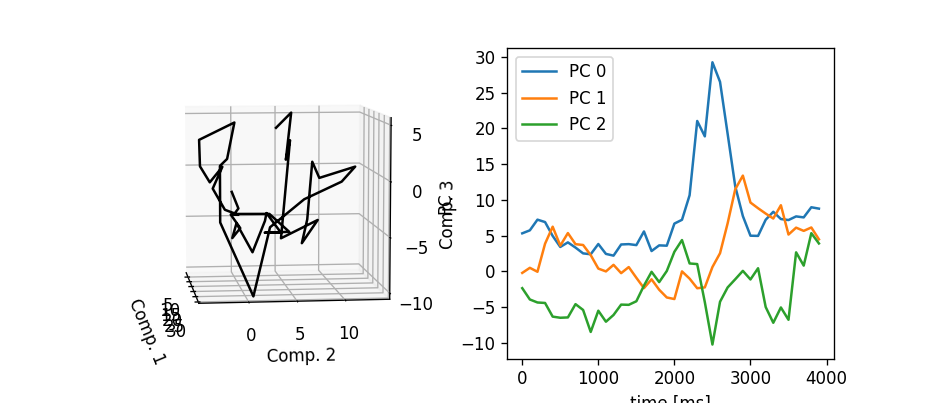

In [9]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121, projection='3d')
ax.plot(PC[0,:], PC[1,:], PC[2,:], '-k')
ax.set_xlabel('Comp. 1')
ax.set_ylabel('Comp. 2')
ax.set_zlabel('Comp. 3')

ax = fig.add_subplot(122)
for i in xrange(len(PC[:,0])):
    ax.plot(t, PC[i,:], '-', label='PC {}'.format(i))
ax.set_xlabel('time [ms]')
ax.set_ylabel('PC')
plt.legend()

## Animated plots with HTML<a id='ani'></a>

The following example is taken from https://matplotlib.org/examples/animation/simple_anim.html

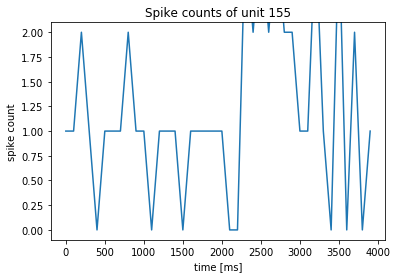

In [10]:
%matplotlib inline

def test(binned):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    line, = ax.plot(t, binned[0,:])

    def animate(i, title_num=None):
        line.set_ydata(binned[i,:])  # update the data
        ax = plt.gca()
        ax.set_title('Spike counts of unit {}'.format(i))
        return line,

    # Init only required for blitting to give a clean slate.
    def init():
        line.set_ydata([])
        return line,

    ani = animation.FuncAnimation(fig, animate, np.arange(1, len(binned[:,0])), init_func=init,
                                  interval=500, blit=True)
    return ani, ax

ani, ax = test(binned)

ax.set_xlabel('time [ms]')
ax.set_ylabel('spike count')

HTML(ani.to_html5_video())

# Nbconvert<a id='nbcon'></a>
Detailed information can be found here: https://github.com/jupyter/nbconvert

In order to cenvert to LaTeX, use:

`jupyter nbconvert --to latex_with_lenvs --LenvsLatexExporter.removeHeaders=True PyMOTW_nbextensions.ipynb`

You can also convert your notebook to a prsentation, e.g. using reveal.js like this (Note, first you need to arrange slides by clicking View -> Cell -> Slideshow):

`jupyter nbconvert --to slides --post serve PyMOTW_nbextensions.ipynb`